# Setup

In [8]:
import re
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import reporting.app.log_analyzer.apache_log_analyzer as apache_log_analyzer
import reporting.app.log_analyzer.log_analyzer as log_analyzer

file_name = 'access.web.20190610.log'

# Draw

## API Statistics

<BarContainer object of 1 artists>

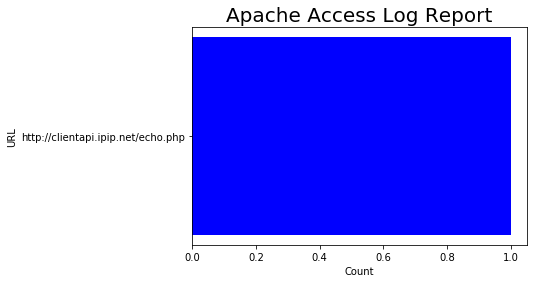

In [20]:
analyzer = apache_log_analyzer.APILogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

output = sorted(output.items(), key=lambda d: d[0])

fig=plt.figure()
subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Count')
subplt1.set_ylabel('URL')

df = pd.DataFrame(output)
subplt1.barh(df[0], df[1], color='blue')


## IP Statistics

<BarContainer object of 34 artists>

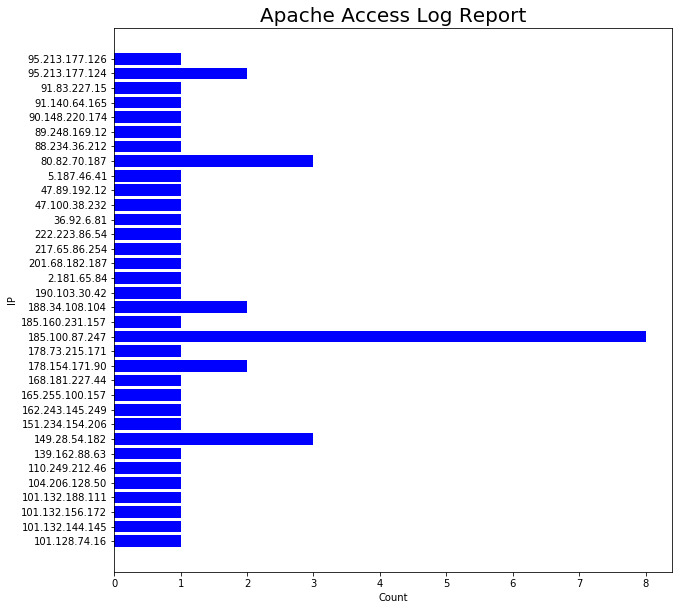

In [19]:
analyzer = log_analyzer.LogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

output = sorted(output.items(), key=lambda d: d[0])

fig=plt.figure(figsize=(10,10))
subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Count')
subplt1.set_ylabel('IP')

df = pd.DataFrame(output)
subplt1.barh(df[0], df[1], color='blue')


## Proxy Statistics

<BarContainer object of 5 artists>

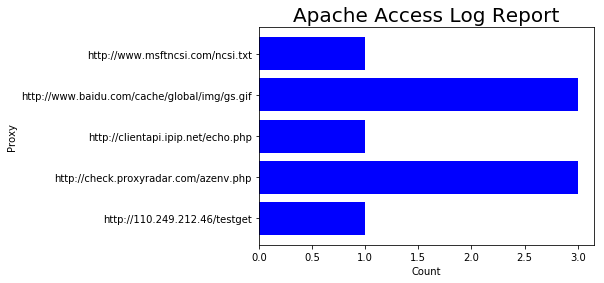

In [15]:
class ProxyLogAnalyzer(log_analyzer.LogAnalyzer):
    def process_line(self, line):
        try:
            key = re.search(re.compile("(?<=\")[^\"]*(?=\")"), line).group(0)
            key = key.split(" ")[1]
            key = key.split("?")[0]
            if 'http' in key:
                # url_comps = key.split("/")
                # key = url_comps[0]+"/"+url_comps[1]+"/"+url_comps[2]+"/"+url_comps[3]
                pass
            else:
                raise Exception("not proxy url")
        except Exception as e:
            pass
        else:
            log_analyzer.LogAnalyzer.__record__(self, key)

analyzer = ProxyLogAnalyzer()
apache_log_analyzer.load_file(file_name, analyzer)

output = analyzer.output

output = sorted(output.items(), key=lambda d: d[0])

fig=plt.figure()
subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Apache Access Log Report', fontsize=20)
subplt1.set_xlabel('Count')
subplt1.set_ylabel('Proxy')

df = pd.DataFrame(output)
subplt1.barh(df[0], df[1], color='blue')
